In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
path = 'data' + os.sep + 'LogiReg_data.txt'
pdData = pd.read_csv(path,header=None,names=['Exam 1','Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
pdData.shape

(100, 3)

In [8]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

Text(0,0.5,'Exam 2 Score')

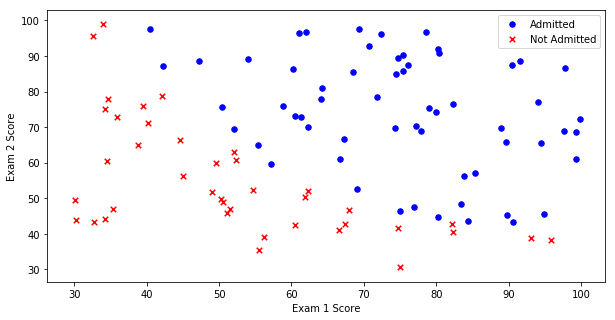

In [11]:
positive = pdData[pdData['Admitted']==1]
negative = pdData[pdData['Admitted']==0]

fig,ax = plt.subplots(figsize=(10,5))

ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o',label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x',label='Not Admitted')

ax.legend()

ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

<h2>The logistic regression</h2>

目标：建立分类器(求解出三个参数θ0，θ1，θ2)

设定阈值，根据阈值判断录取结果

<h3>要完成的模块</h3>

<ul>
    <li>sigmoid：映射到概率的函数</li>
    <li>model：返回预测结果值</li>
    <li>cost：根据函数计算损失</li>
    <li>gradient：计算每个参数的梯度方向</li>
    <li>descent：进行参数更新</li>
    <li>accuracy：计算精度</li>
</ul>

<h3>sigmoid函数</h3>
            g(z)=1/(1+e^(-z))

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

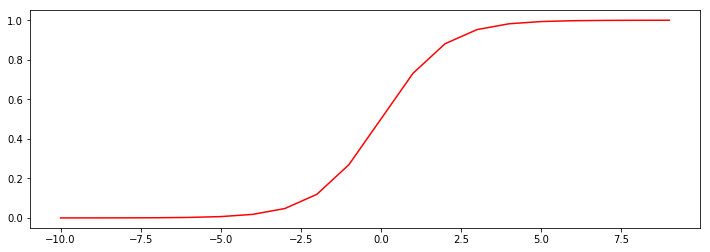

In [14]:
nums = np.arange(-10,10,step=1)
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')

<h2>Sigmoid</h2>
<ul>
    <li>g:R$\rightarrow$[0,1]</li>
    <li>g(0)=0.5</li>
    <li>g(-8)=0</li>
    <li>g(+8)=1</li>
</ul>

In [15]:
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))